<a href="https://colab.research.google.com/github/karlinnn/ML-Practice/blob/main/FS_Standardisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv("/content/Social_Network_Ads.csv")

In [4]:
df=df.iloc[:,2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
273,39,106000,1
143,30,89000,0
181,31,71000,0
294,35,57000,0
397,50,20000,1


### Train and Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop("Purchased",axis=1),
                                               df["Purchased"],
                                               test_size=0.3,random_state=0)

X_train.shape,X_test.shape

((280, 2), (120, 2))

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

#transform train and test sets
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)


In [8]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [9]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [10]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [11]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=X_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=X_test.columns)

In [12]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [13]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [14]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


### Effects of Scaling

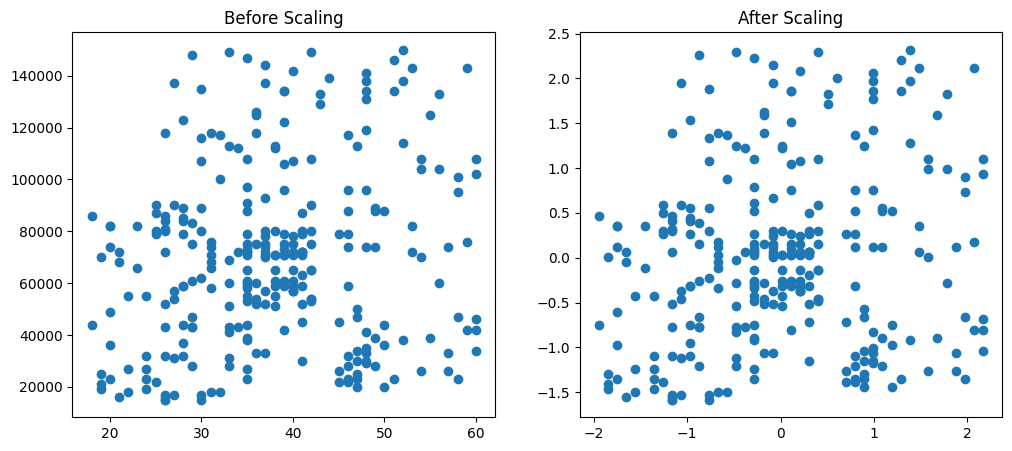

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.title.set_text('Before Scaling')
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'])
ax2.title.set_text('After Scaling')

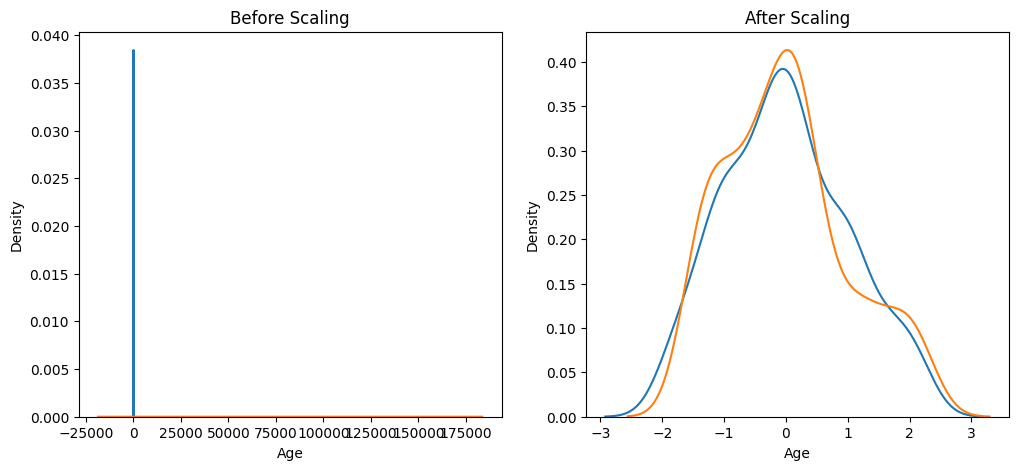

In [16]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

#after scaling
ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

### Comparison of Distribution

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

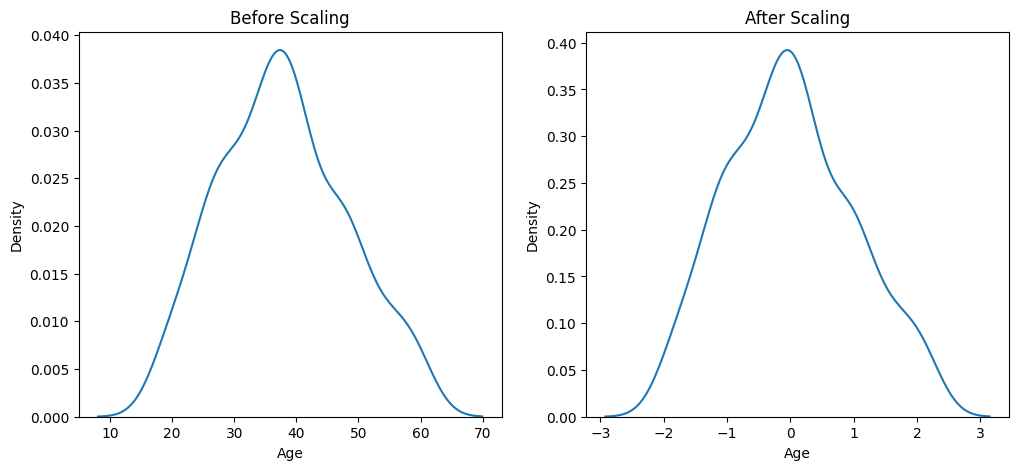

In [17]:
#for age
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)

<Axes: title={'center': 'After Scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

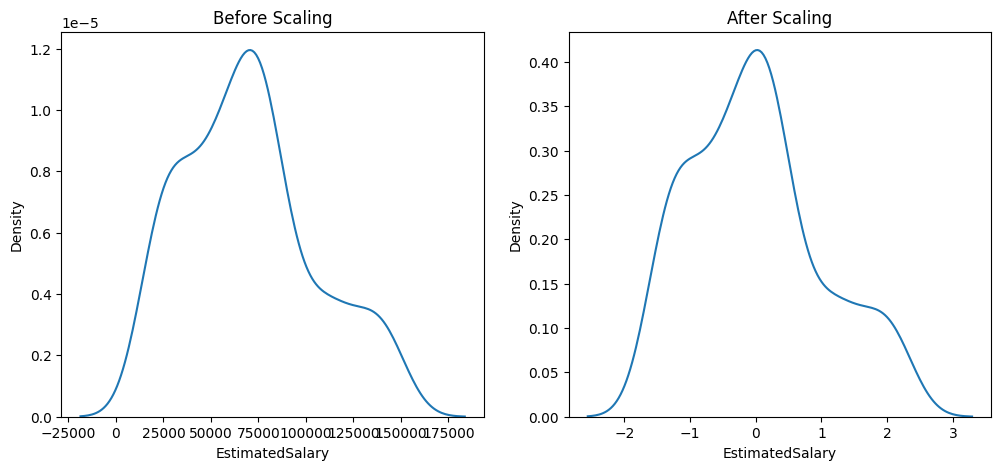

In [18]:
#for salary
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)

### Why Scaling is important?

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="liblinear")
lr_scaled=LogisticRegression(solver="liblinear")
lr.fit(X_train,Y_train)
lr_scaled.fit(x_train_scaled,Y_train)


LogisticRegression(solver='liblinear')

In [20]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)


In [21]:
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(Y_test,y_pred))
print("Scaled",accuracy_score(Y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.875


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [24]:
dt.fit(X_train,Y_train)
dt_scaled.fit(x_train_scaled,Y_train)

DecisionTreeClassifier()

In [25]:
y_pred=dt.predict(X_test)
y_pred_scaled=dt_scaled.predict(x_test_scaled)

In [26]:
print("Actual",accuracy_score(Y_test,y_pred))
print("Scaled",accuracy_score(Y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [27]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Effect of Outlier

In [28]:
df=pd.concat([df,pd.DataFrame({"Age":[5,90,95],"EstimatedSalary":[1000,25000,30000],"Purchased":[0,1,1]})])
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
0,5,1000,0
1,90,25000,1


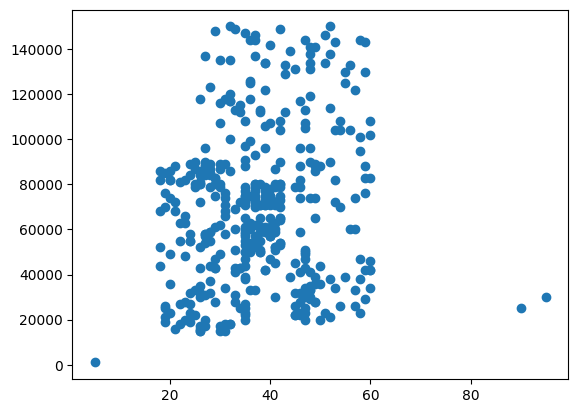

In [29]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(df.drop("Purchased",axis=1),
                                               df["Purchased"],
                                               test_size=0.3,
                                               random_state=0)


In [31]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

#fit the scaler into the train set, it will learn the parameters
scaler.fit(X_train)

#transform train and test sets
x_train_scaled=scaler.transform(X_train)
x_test_scaled=scaler.transform(X_test)

In [32]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=X_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=X_test.columns)

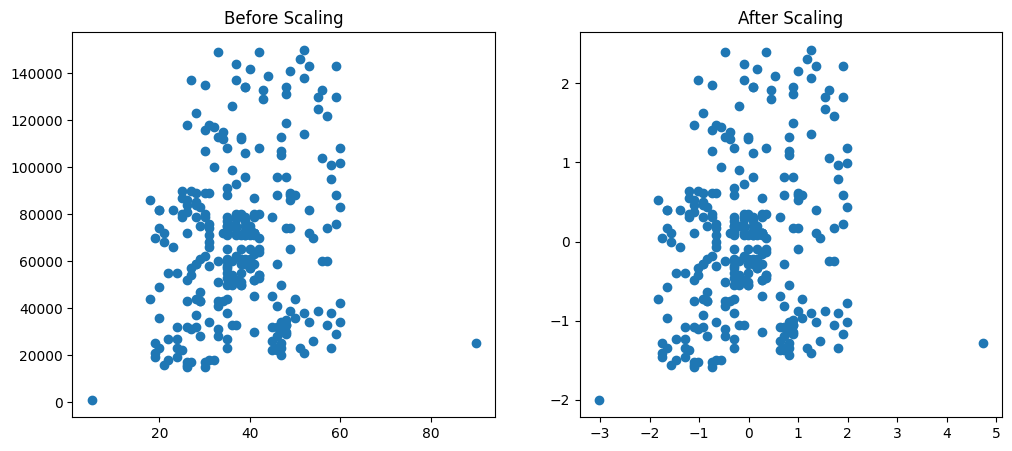

In [33]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.title.set_text('Before Scaling')

ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'])
ax2.title.set_text('After Scaling')
